# Churn Predictor Model

### Importing necessary packages

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import re  #This library is regular expression operations
import os #for extracting the folder paths
import glob #for extracting the file paths from folders
from itertools import chain  #for flattening a list of lists into a single list


### Importing raw transactional banking data for the model

In [2]:
#Input the folder with the churn data
churn_txns_folder = "C:/Users/Victor.Kulankash/OneDrive - NCBA Group PLC/Desktop/Models/Churn Model/churn data from payments & collection volumes updated.xlsx"
print("Retrieving the file paths of connect Transaction  Banking...")

#Retrieving the file paths of the Data
file_paths = glob.glob(churn_txns_folder)

print("Importing the data on Banking Txns...")

#Importing the data on ELMA Mobile Banking Txns
churn_data_txns_df = pd.concat([pd.read_excel(a ) 
                              for a in file_paths],ignore_index=True).dropna(how='all', axis=1)

print('The Data Import of Churn Banking Txns is now done')
churn_data_txns_df.sample(10)

Retrieving the file paths of connect Transaction  Banking...
Importing the data on Banking Txns...
The Data Import of Churn Banking Txns is now done


,CUSTOMER_ID,Corp,BB,Customer Tenure(Oct24th),Days since last Credit(Oct24th),Days since last Debit(Oct24th),Txn Vol YTD Sept 22,Txn Vol YTD Sept 23,Collections YTD 22,Collections YTD 23,Payments YTD 22,Payment YTD 23,Label
24309,565601,0,1,445,15,25,3,4,130000.00,30100.00,0.00,127515.00,NOT CHURN
6054,272330,0,1,1170,896,887,16,0,1065688.80,0.00,1061000.00,0.00,CHURN
26978,602726,0,1,271,43,139,0,13,0.00,296914.15,0.00,102728.00,NOT CHURN
22197,541365,0,1,551,551,526,1,0,3000.00,0.00,1000.00,0.00,CHURN
34601,817955,0,1,1701,1442,45223,1,0,0.00,0.00,3.60,0.00,CHURN
35403,824297,0,1,1544,97,144,44,2,1251096.37,103331.00,19019764.18,1409.15,CHURN
14886,450706,0,1,1540,5,5,145,42,3624000.00,495850.00,4611619.00,2306597.26,CHURN
9882,360252,0,1,2815,105,8,10,6,2084642.70,1832910.35,1563100.00,415120.00,NOT CHURN
8065,329005,0,1,2672,13,7,5,0,3517497.00,0.00,2100945.00,0.00,CHURN
18971,508216,0,1,741,6,1,189,167,9649324.74,2594400.60,10381835.10,3237473.60,NOT CHURN


In [3]:
## Add Number of channels used, amount transacted per month since Jan 2022 to YTD Sept 2023, 

In [4]:
## Summary information of our transactions dataset

churn_data_txns_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37663 entries, 0 to 37662
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   CUSTOMER_ID                      37663 non-null  int64  
 1   Corp                             37663 non-null  int64  
 2   BB                               37663 non-null  int64  
 3   Customer Tenure(Oct24th)         37663 non-null  int64  
 4   Days since last Credit(Oct24th)  37663 non-null  int64  
 5   Days since last Debit(Oct24th)   37663 non-null  int64  
 6   Txn Vol YTD Sept 22              37663 non-null  int64  
 7   Txn Vol YTD Sept 23              37663 non-null  int64  
 8   Collections YTD 22               37663 non-null  float64
 9   Collections YTD 23               37663 non-null  float64
 10  Payments YTD 22                  37663 non-null  float64
 11  Payment YTD 23                   37663 non-null  float64
 12  Label             

In [5]:
# Using 'LABEL' column  named 'Churn' and other features are in 'X' variable

# Variable X only takes in the features dropping the customer ID identifier and the label to be predicted

X = churn_data_txns_df.drop(columns=['CUSTOMER_ID', 'Label','Txn Vol YTD Sept 23','Collections YTD 23', 'Payment YTD 23'])  



In [6]:

# Converting the label text 'CHURN' & 'NOT CHURN' TO BINARY EQUIVALENTS

y = churn_data_txns_df['Label'].map({'CHURN': 1, 'NOT CHURN': 0})  # Converting to binary format

### Splitting our data into Test set and Train Set - 80% Train, 20% Test


In [7]:

# Target Variable
# 'y' is already converted to binary format.

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Selection

## Using Random Forest Classifier

In [8]:

model = RandomForestClassifier(random_state=42)  # Random Forest Classifier


# Step 5: Model Training
model.fit(X_train, y_train)

# Step 6: Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Step 7: Predict Probability of Churn
y_prob_churn = model.predict_proba(X_test)[:, 1]
print(y_prob_churn)


Accuracy: 0.8303
Precision: 0.8219
Recall: 0.5361
F1 Score: 0.6489
ROC-AUC Score: 0.7440
[0.18 0.45 0.06 ... 0.15 0.32 0.15]


In [9]:

from sklearn.metrics import accuracy_score, classification_report

# Step 8: Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      5330
           1       0.82      0.54      0.65      2203

    accuracy                           0.83      7533
   macro avg       0.83      0.74      0.77      7533
weighted avg       0.83      0.83      0.82      7533



### Valuable insights to the Model's Accuracy

####  Precision = 93% Accuracy
Measures the proportion of customers predicted to churn who actually churned. 
It answers the question: "Out of all the customers the model predicted would churn, how many actually churned?" 
A high precision score indicates that the model is good at making accurate positive predictions, meaning it is not incorrectly flagging customers as churners when they are not.

#### Recall 
Measures the proportion of actual churned customers that the model correctly identified. 
It answers the question: "Out of all the customers who actually churned, how many did the model correctly predict would churn?" 
A high recall score indicates that the model is good at identifying churned customers, meaning it is not missing out on many true churners.

#### F1-score 
This is a harmonic mean of precision and recall, providing a balanced measure of both aspects. It considers both the model's ability to correctly identify churned customers (recall) and its ability to avoid incorrectly flagging non-churners as churners (precision). A high F1-score indicates that the model is good at both identifying churned customers and avoiding false positives.

#### Support 
Indicates the total number of customers in each class, either churned or not churned. It provides context for interpreting the precision, recall, and f1-score values.

In the context of churn prediction, a model with high precision and recall is ideal. 
* #### High precision ensures that the bank is not wasting resources on customers who are not likely to churn
* #### High recall ensures that the bank is not missing out on opportunities to retain valuable customers.
* #### The f1-score provides a single metric that combines precision and recall, making it a useful tool for comparing different churn prediction models.

## Using Gradient Boosting Model

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

# Step 5: Model Training
model2 = GradientBoostingClassifier(random_state=42)
model2.fit(X_train, y_train)

# Step 6: Model Evaluation
y_pred2 = model.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred)
precision2 = precision_score(y_test, y_pred)
recall2 = recall_score(y_test, y_pred)
f1_2 = f1_score(y_test, y_pred)
roc_auc_2 = roc_auc_score(y_test, y_pred)

print(f"For the model using Gradient Boosting")
print(f"Accuracy: {accuracy2:.4f}")
print(f"Precision: {precision2:.4f}")
print(f"Recall: {recall2:.4f}")
print(f"F1 Score: {f1_2:.4f}")
print(f"ROC-AUC Score: {roc_auc_2:.4f}")

# Step 7: Predict Probability of Churn
y_prob_churn2 = model.predict_proba(X_test)[:, 1]
print(y_prob_churn2)

For the model using Gradient Boosting
Accuracy: 0.8303
Precision: 0.8219
Recall: 0.5361
F1 Score: 0.6489
ROC-AUC Score: 0.7440
[0.18 0.45 0.06 ... 0.15 0.32 0.15]


In [11]:
from sklearn.metrics import accuracy_score, classification_report

# Step 8: Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred2))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      5330
           1       0.82      0.54      0.65      2203

    accuracy                           0.83      7533
   macro avg       0.83      0.74      0.77      7533
weighted avg       0.83      0.83      0.82      7533



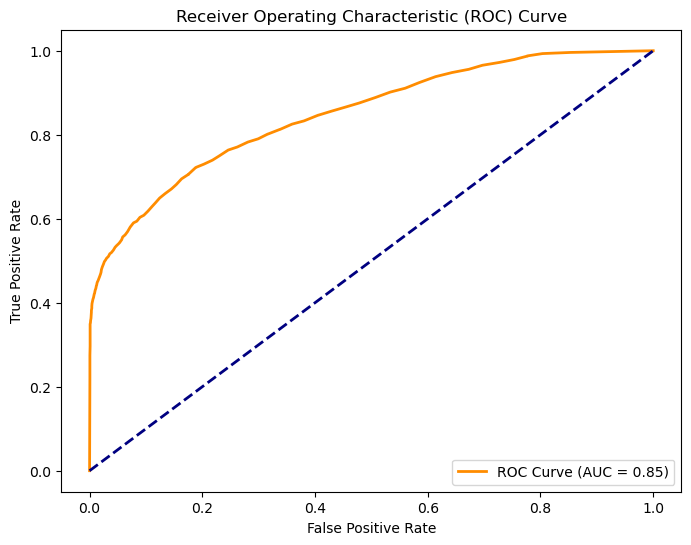

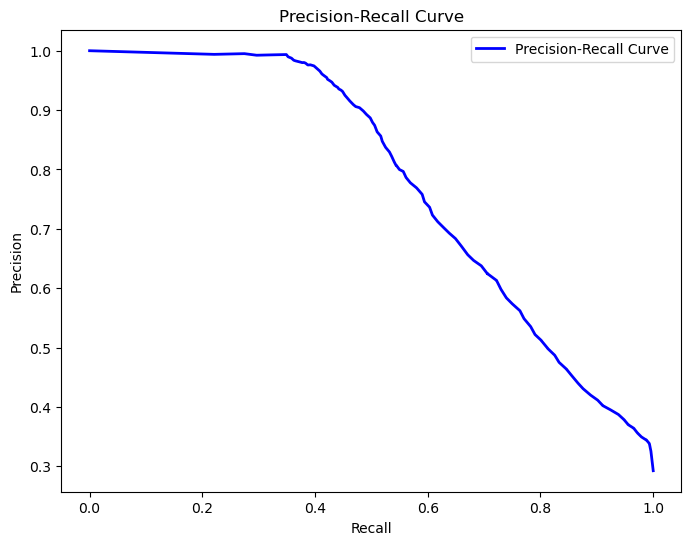

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_prob_churn2)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_prob_churn2)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()


In [15]:
from sklearn.metrics import confusion_matrix

# Assuming y_test contains the actual labels and y_pred contains the predicted labels
# y_test and y_pred should be binary (0 or 1) indicating non-churn and churn, respectively

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[5074  256]
 [1022 1181]]


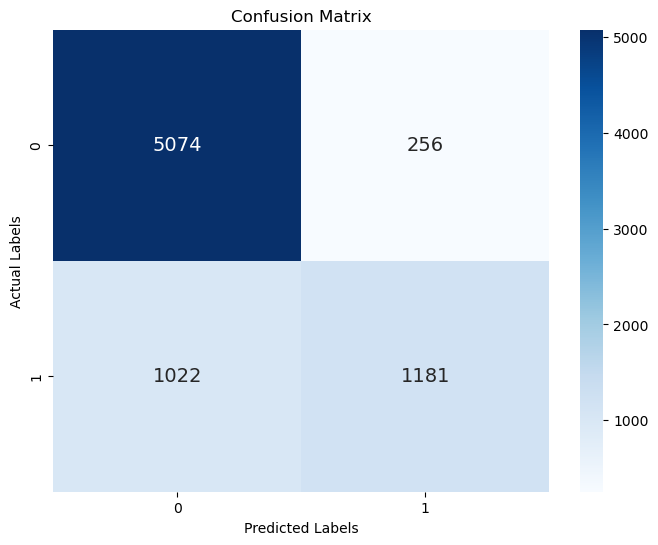

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming conf_matrix is the confusion matrix obtained from your model
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})

# Adding labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()


# Using the model to make Predictions on 2023 dataset

In [27]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

# Load your new dataset without labels
new_data = churn_data_txns_df.drop(columns = ['Txn Vol YTD Sept 23','Collections YTD 23', 'Payment YTD 23'])
new_data.sample(10)

,CUSTOMER_ID,Corp,BB,Customer Tenure(Oct24th),Days since last Credit(Oct24th),Days since last Debit(Oct24th),Txn Vol YTD Sept 22,Collections YTD 22,Payments YTD 22,Label
791,142337,0,1,5986,8,7,16,597940.00,580434.30,NOT CHURN
29981,636259,0,1,141,82,71,0,0.00,0.00,NOT CHURN
6415,317920,0,1,2254,15,15,12,2359163.00,8099.00,NOT CHURN
7782,349836,0,1,1902,19,19,11,1283470.00,310365.00,NOT CHURN
16175,477874,0,1,953,258,258,0,227523.47,0.00,NOT CHURN
8415,307124,0,1,2716,1,1,302,73272649.75,56297837.44,NOT CHURN
26435,586934,0,1,341,134,139,0,0.00,0.00,NOT CHURN
2527,170088,0,1,4919,1,5,51,12018534.00,5458763.00,CHURN
20787,524875,0,1,637,634,622,1,3000.00,1000.00,CHURN
12928,416492,0,1,1733,383,383,0,1734000.00,0.00,CHURN


In [30]:

# Assuming X_new contains the features of your new dataset
X_new = new_data.drop(columns = ['CUSTOMER_ID', 'Label'], axis=1)  # Remove the column with labels if it exists

In [31]:


# Standardize the features (important for consistency with the training data)
scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(X_new)

# Assuming model2 is your trained GradientBoostingClassifier
# Replace it with the name of your actual model

y_pred_new_proba = model2.predict_proba(X_new_scaled)[:, 1]  # Predict probabilities of churn
y_pred_new = (y_pred_new_proba >= 0.5).astype(int)  # Apply a threshold to get binary predictions

# Append predictions to the new_data DataFrame
new_data['Churn_Prediction_Prob'] = y_pred_new_proba
new_data['Churn_Prediction'] = y_pred_new

# Save the updated DataFrame to a new CSV file
new_data.to_csv('C:/Users/Victor.Kulankash/OneDrive - NCBA Group PLC/Desktop/Models/Churn Model/churn_output.csv', index=False)


C:\Users\Victor.Kulankash\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


PermissionError: [Errno 13] Permission denied: 'C:/Users/Victor.Kulankash/OneDrive - NCBA Group PLC/Desktop/Models/Churn Model/churn_output.csv'

In [32]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier

# Load your data file for comparison (replace 'path_to_your_data_file.csv' with the actual path)
data_for_comparison = churn_data_txns_df

data_for_comparison = churn_data_txns_df.drop(columns = ['Txn Vol YTD Sept 22', 'Collections YTD 22' , 'Payments YTD 22', 'CUSTOMER_ID'])

In [36]:

# Rename columns
data_for_comparison.rename(columns={'Txn Vol YTD Sept 23': 'Txn Vol YTD Sept 22', 'Collections YTD 22': 'Collections YTD 22', 'Payments YTD 23':'Payments YTD 22'}, inplace=True)

In [37]:
# Assuming X_test contains the features used for testing
# Replace it with the actual features you used for testing
X_test = data_for_comparison.drop(['Label'], axis=1)  # Remove the column with true labels

# Assuming model2 is your trained GradientBoostingClassifier
# Replace it with the name of your actual model
y_pred_proba = model2.predict_proba(X_test)[:, 1]  # Predict probabilities of churn

# Set your custom churn threshold (replace 0.5 with your specific threshold)
custom_threshold = 0.5

# Apply your custom churn threshold to get binary predictions
y_pred = (y_pred_proba < custom_threshold).astype(int)

# Append predictions to the data_for_comparison DataFrame
data_for_comparison['Churn_Prediction_Prob'] = y_pred_proba
data_for_comparison['Churn_Prediction'] = y_pred

# Save the updated DataFrame to a new CSV file
data_for_comparison.to_csv('C:/Users/Victor.Kulankash/OneDrive - NCBA Group PLC/Desktop/Models/Churn Model/churn_output.csv', index=False)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Collections YTD 23
- Payment YTD 23
Feature names seen at fit time, yet now missing:
- Collections YTD 22
- Payments YTD 22
